# LUNA Experiment: grid search of regularization and diversification

In this notebook, we performed experiments on LUNA trained with 10 auxiliary functions with a grid search of regularization and diversification, and compared to results to NLM on the 1-D cubic gap dataset.

In [1]:
import time
import sys; sys.path.insert(0, "..")
import os; imagePath = os.path.abspath('..') + '/images/'
from src.models import NLM, LUNA
from src.utils import generate_data, format_time, neg_log_likelihood, epistemic_uncertainty

In [2]:
from autograd import numpy as np
import matplotlib.pyplot as plt

## Generate toy data

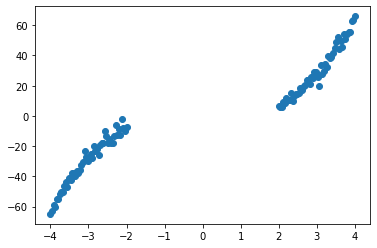

In [3]:
x, y, x_test, y_test = generate_data(number_of_points=50, noise_variance=9)
plt.scatter(x, y)
plt.show()

# Extract test data (gap vs. non-gap)
gap_idx = np.logical_and(x_test > -2, x_test < 2)
x_test_gap = x_test[gap_idx].reshape(1,-1)
y_test_gap = y_test[gap_idx].reshape(1,-1)

non_gap_idx = np.logical_or(np.logical_and(x_test > -4, x_test < -2),np.logical_and(x_test > 2, x_test < 4))
x_test_non_gap = x_test[non_gap_idx].reshape(1,-1)
y_test_non_gap = y_test[non_gap_idx].reshape(1,-1)

## Define function for training NLM and LUNA

In [4]:
def experiment_LUNA_1D(n_aux, reg_param, lambda_in, step_size=1e-2, max_iteration=1500, x_train=x, y_train=y):
    activation_fn_type = 'relu'
    activation_fn = lambda x: np.maximum(np.zeros(x.shape), x)

    input_dim = 1
    output_dim = 1
    width = [50,50] # using the architecture used in the paper

    architecture = {
        'width': width,
        'input_dim': input_dim,
        'output_dim': output_dim,
        'activation_fn_type': 'relu',
        'activation_fn_params': 'rate=1',
        'activation_fn': activation_fn,
        'auxiliary_functions': n_aux,
    }

    params = {
        'step_size': step_size,
        'max_iteration': max_iteration,
        'random_restarts': 1,
        'reg_param': reg_param,
        'lambda_in': lambda_in,
    }

    rand_state = 207
    random = np.random.RandomState(rand_state)

    luna = LUNA(architecture, random=random)
    print("")
    print(f"===== [ Aux Functions: {n_aux} ] === [ Regularization: {reg_param} ] === [ Diversification: {lambda_in} ] =====")
    print("")
    t0 = time.time()
    luna.fit(x_train, y_train, params)
    print("")
    print("Training took {:} (h:mm:ss)".format(format_time(time.time()-t0)))

    return luna

In [5]:
def experiment_NLM_1D(reg_param, step_size=1e-2, max_iteration=1500, x_train=x, y_train=y):
    activation_fn_type = 'relu'
    activation_fn = lambda x: np.maximum(np.zeros(x.shape), x)

    input_dim = 1
    output_dim = 1
    width = [50,50] # using the architecture used in the paper

    architecture = {
        'width': width,
        'input_dim': input_dim,
        'output_dim': output_dim,
        'activation_fn_type': 'relu',
        'activation_fn_params': 'rate=1',
        'activation_fn': activation_fn
    }

    params = {
        'step_size': step_size,
        'max_iteration': max_iteration,
        'random_restarts': 1,
        'reg_param': reg_param
    }

    rand_state = 207
    random = np.random.RandomState(rand_state)

    nlm = NLM(architecture, random=random)
    print("")
    print(f"===== NLM [ Regularization: {reg_param} ]  =====")
    print("")
    t0 = time.time()
    nlm.fit(x_train, y_train, params)
    print("")
    print("Training took {:} (h:mm:ss)".format(format_time(time.time()-t0)))

    return nlm

## Set hyperparameters

In [6]:
n_aux = 10
reg_grid = [0., 100., 300., 600., 1000., 3000., 6000.]
div_grid = [0., 10., 100., 1000., 10000.]

step_size = 1e-2
max_iteration_nlm = 2000
max_iteration_luna = 2000

## Fit with NLM and LUNA

In [12]:
nlm_list = []
for reg in reg_grid:
    nlm = experiment_NLM_1D(reg, step_size = step_size, max_iteration = max_iteration_nlm)
    nlm_list.append(nlm)


===== NLM [ Regularization: 0.0 ]  =====

Iteration 0 loss 8568.003018906833; gradient mag: 19649.114005376163
Iteration 100 loss 83.01221440102125; gradient mag: 69.16823856861065
Iteration 200 loss 18.77401454877355; gradient mag: 41.32507767797664
Iteration 300 loss 9.17030204724448; gradient mag: 7.034803095228057
Iteration 400 loss 8.102316241349738; gradient mag: 6.159021364469814
Iteration 500 loss 7.7368445028771635; gradient mag: 6.256507381309808
Iteration 600 loss 7.4332021128041115; gradient mag: 3.3415158718303175
Iteration 700 loss 7.405580903781448; gradient mag: 8.67700374354421
Iteration 800 loss 7.384162275278925; gradient mag: 13.415572078460345
Iteration 900 loss 7.357777318019364; gradient mag: 9.92966465216165
Iteration 1000 loss 7.332232967312072; gradient mag: 6.333026278557903
Iteration 1100 loss 7.305348214651443; gradient mag: 3.134627050935555
Iteration 1200 loss 7.278785686149755; gradient mag: 6.506137615427013
Iteration 1300 loss 7.253099189945362; gradi

Iteration 1000 loss 240.74375628649545; gradient mag: 26.032872617337144
Iteration 1100 loss 212.70854643604474; gradient mag: 23.602885363032858
Iteration 1200 loss 190.3207620433065; gradient mag: 21.18325032392291
Iteration 1300 loss 172.38023073630183; gradient mag: 19.29682371551566
Iteration 1400 loss 158.0021627119602; gradient mag: 16.899419517855577
Iteration 1500 loss 146.54870587816066; gradient mag: 15.287347507501815
Iteration 1600 loss 137.4561375072383; gradient mag: 13.972466954807794
Iteration 1700 loss 130.21881772619312; gradient mag: 12.520705983483003
Iteration 1800 loss 124.48360564843128; gradient mag: 12.066584989528922
Iteration 1900 loss 119.99502938685387; gradient mag: 10.29275636707836

Training took 0:00:33 (h:mm:ss)

===== NLM [ Regularization: 6000.0 ]  =====

Iteration 0 loss 14952.750017928009; gradient mag: 19661.351704025892
Iteration 100 loss 2989.5309584956844; gradient mag: 187.12674870513308
Iteration 200 loss 1732.5276516346369; gradient mag: 12

In [7]:
luna_list = []
for div in div_grid:
    for reg in reg_grid:
        luna = experiment_LUNA_1D(n_aux, reg, div, step_size = step_size, max_iteration = max_iteration_luna)
        luna_list.append(luna)
        


===== [ Aux Functions: 10 ] === [ Regularization: 0.0 ] === [ Diversification: 0.0 ] =====

Iteration 0 loss 11335.576784157765; gradient mag: 9214.612715227435
Iteration 100 loss 52.39227774450458; gradient mag: 35.61389996410182
Iteration 200 loss 19.704772939549148; gradient mag: 14.838859821897303
Iteration 300 loss 11.804079248024747; gradient mag: 7.549160438308035
Iteration 400 loss 9.993414831776871; gradient mag: 4.221567140474067
Iteration 500 loss 9.146891599344405; gradient mag: 6.813538303734511
Iteration 600 loss 8.550324948306391; gradient mag: 2.133921530080203
Iteration 700 loss 8.194330279197422; gradient mag: 2.9954268420079493
Iteration 800 loss 7.967901197908855; gradient mag: 2.680147106043459
Iteration 900 loss 7.820943288024515; gradient mag: 4.214766855320293
Iteration 1000 loss 7.704407555089625; gradient mag: 5.542379222658352
Iteration 1100 loss 7.5994561615328715; gradient mag: 2.821497587461543
Iteration 1200 loss 7.506188100855339; gradient mag: 3.137768

Iteration 600 loss 441.537842118145; gradient mag: 34.02941097033934
Iteration 700 loss 374.3814093272293; gradient mag: 29.447325974705116
Iteration 800 loss 324.1605807216977; gradient mag: 25.974783529890978
Iteration 900 loss 286.04351127588194; gradient mag: 22.742742030747984
Iteration 1000 loss 256.94541605814345; gradient mag: 20.180948158703956
Iteration 1100 loss 234.574415291239; gradient mag: 18.161206499931577
Iteration 1200 loss 217.27799114804134; gradient mag: 15.581745091867496
Iteration 1300 loss 204.09101456471544; gradient mag: 13.365022184357635
Iteration 1400 loss 194.0820922958727; gradient mag: 11.764919804894278
Iteration 1500 loss 186.41225792579908; gradient mag: 10.814269314405994
Iteration 1600 loss 180.68961721941156; gradient mag: 9.94137234089847
Iteration 1700 loss 176.35829390860312; gradient mag: 7.973746931853938
Iteration 1800 loss 173.01879368693196; gradient mag: 7.027481544286561
Iteration 1900 loss 170.34948576226378; gradient mag: 7.48058507955

Iteration 1200 loss 143.05993373538385; gradient mag: 9.083389277504404
Iteration 1300 loss 133.82505935185756; gradient mag: 9.091849439077466
Iteration 1400 loss 125.55932847372492; gradient mag: 9.199456781170777
Iteration 1500 loss 118.23371386853128; gradient mag: 7.526423854018627
Iteration 1600 loss 111.7223979983499; gradient mag: 7.117760801991964
Iteration 1700 loss 105.86597768945852; gradient mag: 7.899755759383249
Iteration 1800 loss 100.5655418243116; gradient mag: 6.222124737181377
Iteration 1900 loss 95.77962564552381; gradient mag: 6.436355255917132

Training took 0:00:57 (h:mm:ss)

===== [ Aux Functions: 10 ] === [ Regularization: 1000.0 ] === [ Diversification: 10.0 ] =====

Iteration 0 loss 12350.04530215695; gradient mag: 9221.21166485766
Iteration 100 loss 722.8481336452924; gradient mag: 45.001449872020146
Iteration 200 loss 543.0329968010011; gradient mag: 26.814816074516738
Iteration 300 loss 454.9628194242336; gradient mag: 25.0898772320392
Iteration 400 loss 

Iteration 1800 loss 152.48660295010603; gradient mag: 105.64461482707105
Iteration 1900 loss 148.84693684103212; gradient mag: 74.98002171971719

Training took 0:00:52 (h:mm:ss)

===== [ Aux Functions: 10 ] === [ Regularization: 300.0 ] === [ Diversification: 100.0 ] =====

Iteration 0 loss 11731.801613685615; gradient mag: 9240.79362416723
Iteration 100 loss 392.1000526577067; gradient mag: 65.50996399424545
Iteration 200 loss 330.76605844932647; gradient mag: 53.758267458472694
Iteration 300 loss 307.6565306731538; gradient mag: 237.73374022019243
Iteration 400 loss 284.60385342474814; gradient mag: 102.57227796397146
Iteration 500 loss 267.9731238719839; gradient mag: 24.54763398550197
Iteration 600 loss 257.5433198883051; gradient mag: 56.03855853062034
Iteration 700 loss 247.139189382584; gradient mag: 37.78570392572236
Iteration 800 loss 237.7773385638963; gradient mag: 44.850183409716315
Iteration 900 loss 228.38675681597528; gradient mag: 39.19392970257826
Iteration 1000 loss 2

Iteration 300 loss 615.7833257868579; gradient mag: 1042.2136872501917
Iteration 400 loss 615.0185281539025; gradient mag: 1046.740110179889
Iteration 500 loss 600.2686820767759; gradient mag: 904.6258939629619
Iteration 600 loss 597.6144736092858; gradient mag: 448.6816202220469
Iteration 700 loss 606.3253639351598; gradient mag: 918.4844966471649
Iteration 800 loss 618.0382864669995; gradient mag: 2983.832874113655
Iteration 900 loss 602.9028421811274; gradient mag: 1695.7701401341883
Iteration 1000 loss 596.6974595163903; gradient mag: 219.94076144370538
Iteration 1100 loss 624.1271675574446; gradient mag: 1036.0373235667
Iteration 1200 loss 600.8753812913752; gradient mag: 605.6946364793419
Iteration 1300 loss 598.9508240556995; gradient mag: 902.4351048119695
Iteration 1400 loss 600.6402037883839; gradient mag: 1341.9668596277709
Iteration 1500 loss 596.4985412911358; gradient mag: 43.40132180254727
Iteration 1600 loss 596.7491697111918; gradient mag: 278.4878517853427
Iteration 1

Iteration 1000 loss 945.0512687765973; gradient mag: 178.8997883297489
Iteration 1100 loss 910.6768348631715; gradient mag: 44.54575485860308
Iteration 1200 loss 883.3737837011298; gradient mag: 175.13065864251382
Iteration 1300 loss 860.3030936859661; gradient mag: 135.8590875838081
Iteration 1400 loss 843.3075938888692; gradient mag: 296.94195516653207
Iteration 1500 loss 829.2882699727035; gradient mag: 106.43082516295678
Iteration 1600 loss 818.115074301898; gradient mag: 56.26182151655829
Iteration 1700 loss 808.93528000631; gradient mag: 82.65484350490587
Iteration 1800 loss 822.8336910741727; gradient mag: 1510.989934708471
Iteration 1900 loss 796.3298402299056; gradient mag: 31.989035046528187

Training took 0:00:49 (h:mm:ss)

===== [ Aux Functions: 10 ] === [ Regularization: 6000.0 ] === [ Diversification: 1000.0 ] =====

Iteration 0 loss 18315.778890715097; gradient mag: 9613.842518987058
Iteration 100 loss 3919.511320105735; gradient mag: 862.0929754093102
Iteration 200 loss

Iteration 1700 loss 6630.868750710291; gradient mag: 6466.56234981437
Iteration 1800 loss 5372.186450825189; gradient mag: 10616.472890598474
Iteration 1900 loss 5329.085859779409; gradient mag: 9702.556025443524

Training took 0:00:57 (h:mm:ss)

===== [ Aux Functions: 10 ] === [ Regularization: 1000.0 ] === [ Diversification: 10000.0 ] =====

Iteration 0 loss 21805.899475534345; gradient mag: 18109.034803748094
Iteration 100 loss 5424.150271974636; gradient mag: 13716.284738863535
Iteration 200 loss 5318.806032778468; gradient mag: 9976.77729876594
Iteration 300 loss 5846.85649563293; gradient mag: 35200.57764583449
Iteration 400 loss 5692.2112133489645; gradient mag: 12841.916057312215
Iteration 500 loss 5238.1974489519835; gradient mag: 10937.911030200503
Iteration 600 loss 5198.121501929443; gradient mag: 6309.362790580643
Iteration 700 loss 5291.222823163749; gradient mag: 8579.502493034652
Iteration 800 loss 5158.634142757796; gradient mag: 2308.8222611067677
Iteration 900 loss 5

## Plot auxiliary functions after fitting

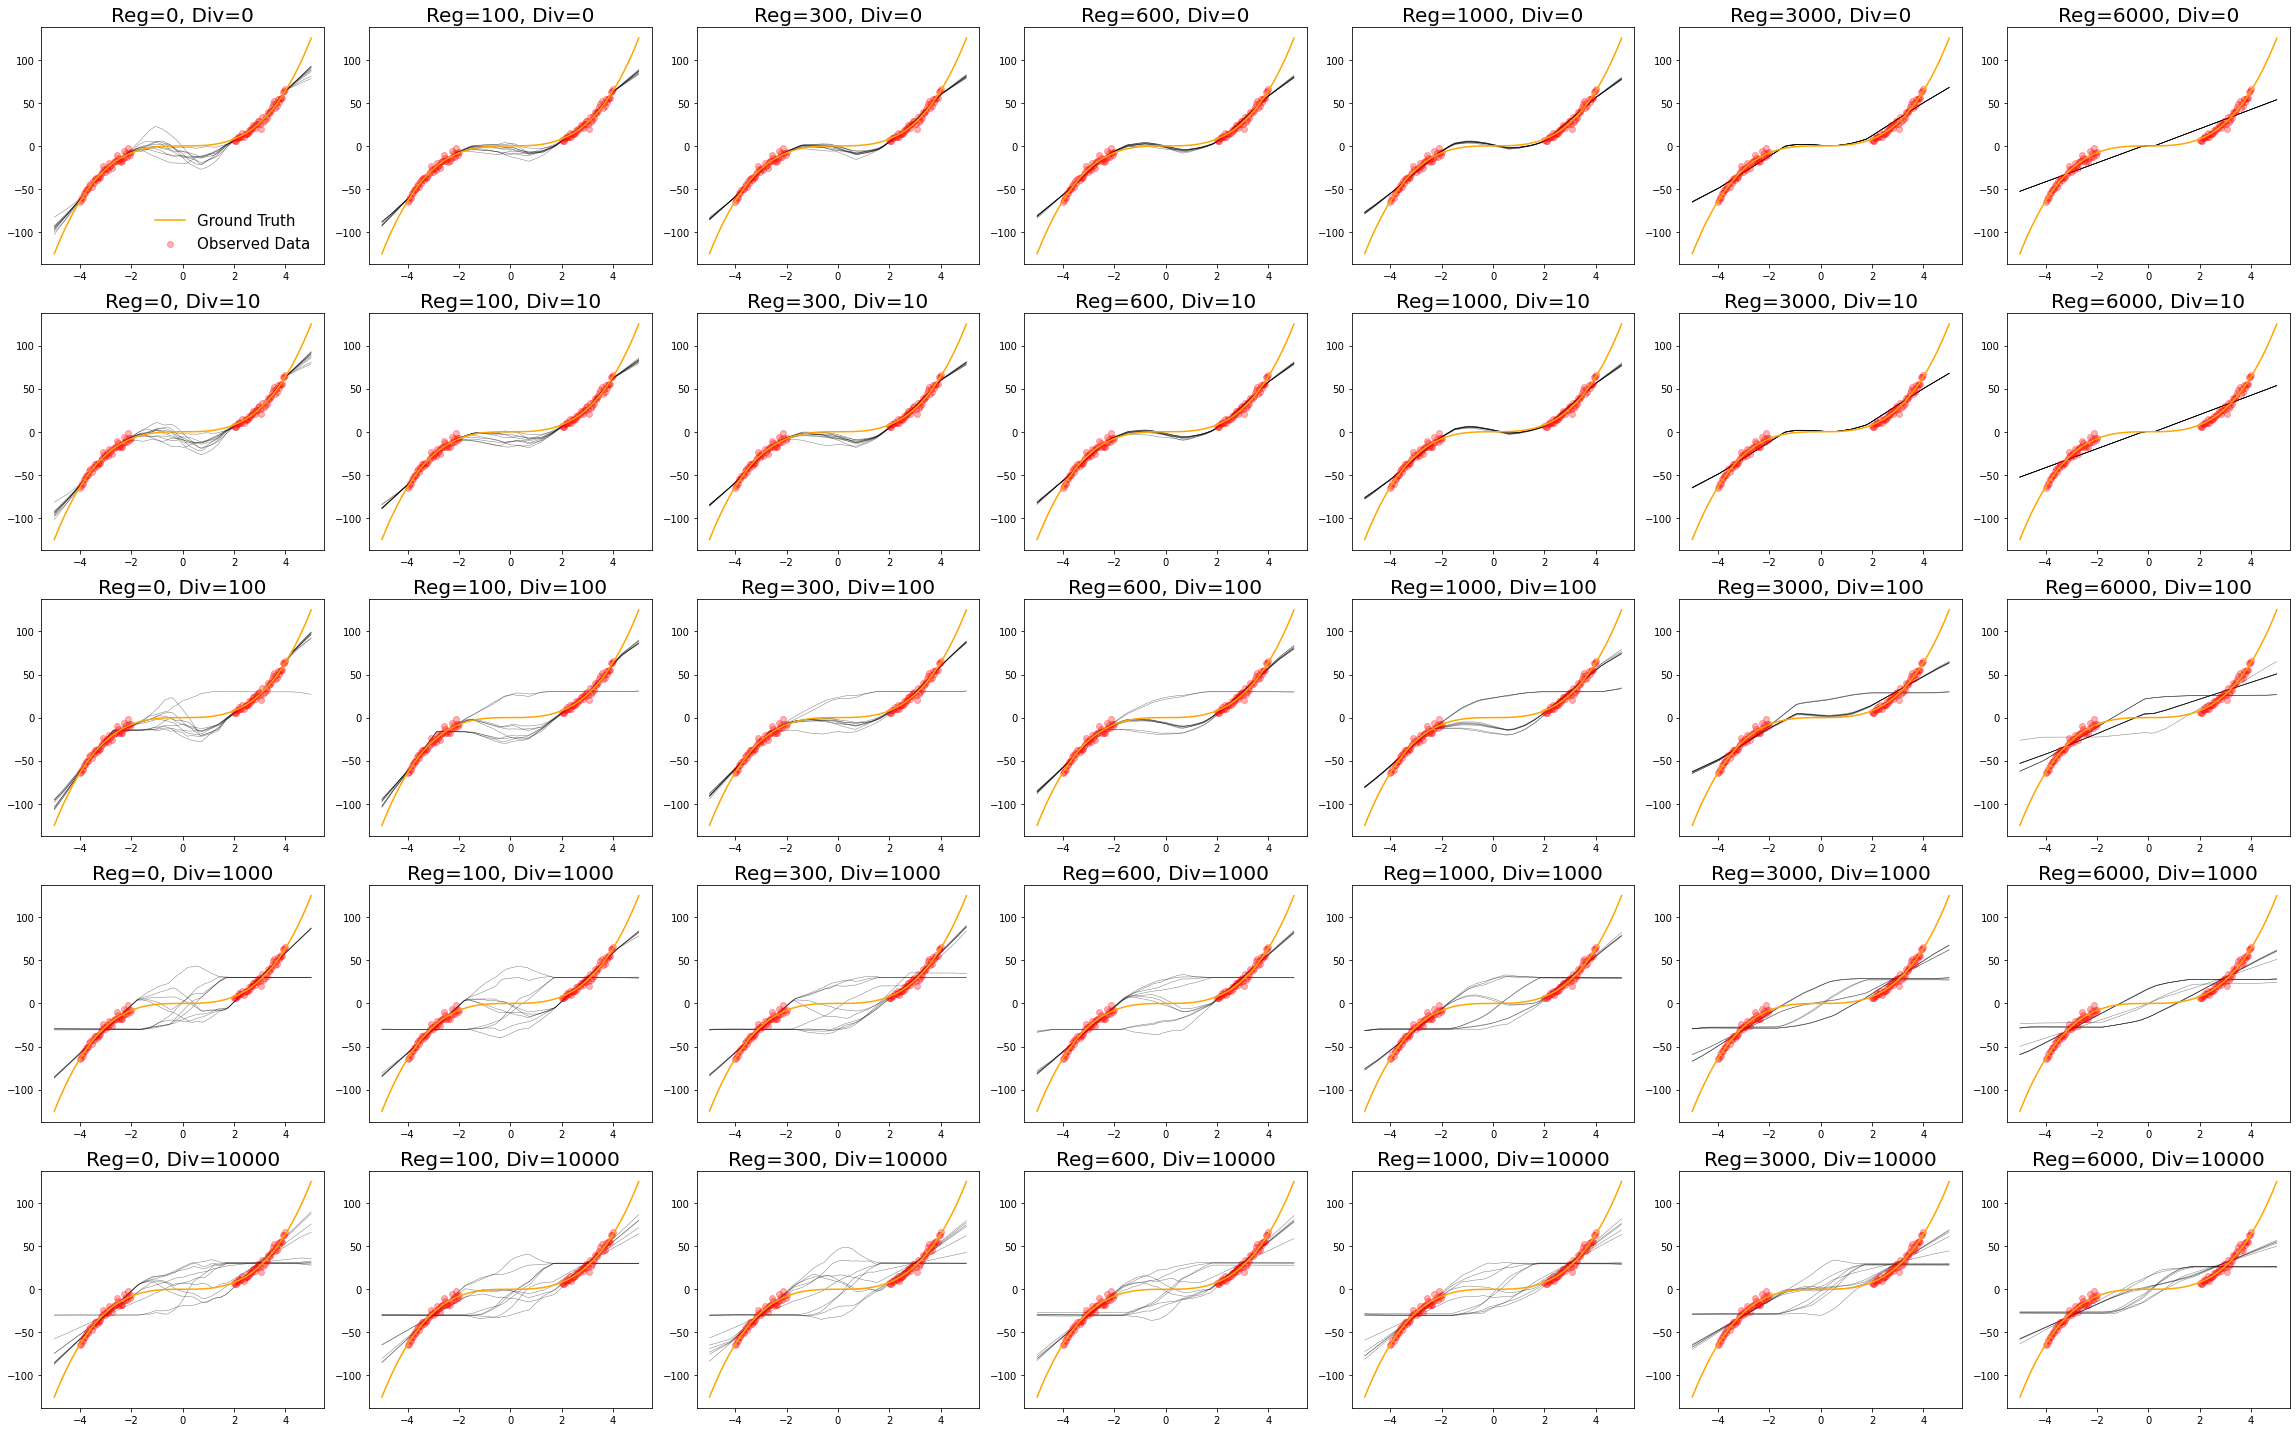

In [29]:
fig, axes = plt.subplots(len(div_grid), len(reg_grid), figsize=(32, 20))
for i, ax in enumerate(axes.flat):
    luna = luna_list[i]
    y_pred = luna.forward(luna.weights, x_test)
    ax.scatter(x[0,:], y[0,:], color='red', alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], y_test[0,:], color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], np.squeeze(y_pred).T, color='black', linewidth=0.5, alpha=0.5, zorder=0)
#     ax.set_title(f"Auxiliary Functions\n[Aux={luna.params['M']}, Reg={luna.params['reg_param']}, Div={luna.params['lambda_in']}]",fontsize = 20)
    ax.set_title(f"Reg={int(luna.params['reg_param'])}, Div={int(luna.params['lambda_in'])}",fontsize = 20)
    if i == 0:
        ax.legend(loc=4,fontsize = 15, frameon = False)
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.savefig(imagePath+'aux_funcs_10_aux_2000_steps.png',dpi = 150)
plt.show()

## Plot prior samples

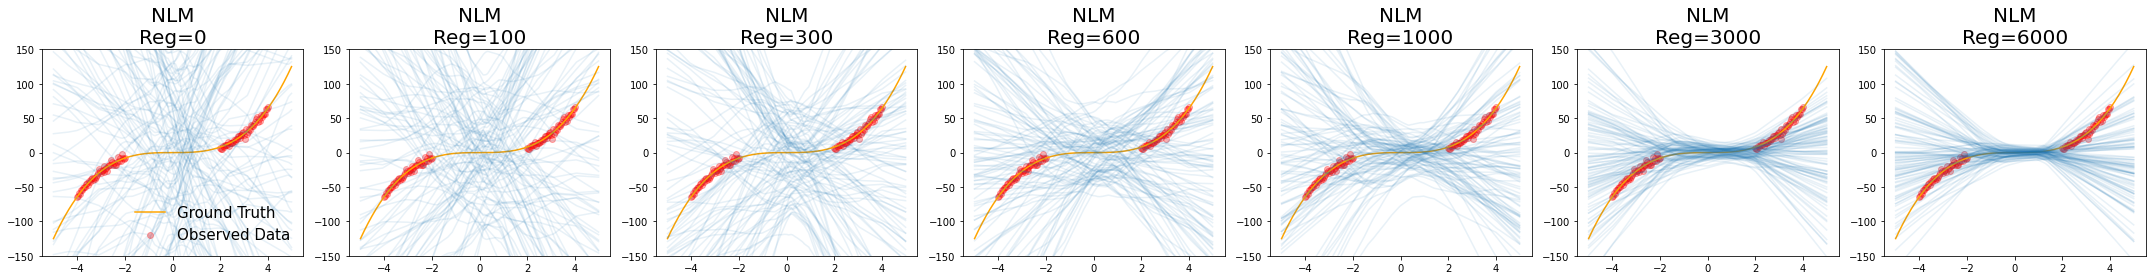

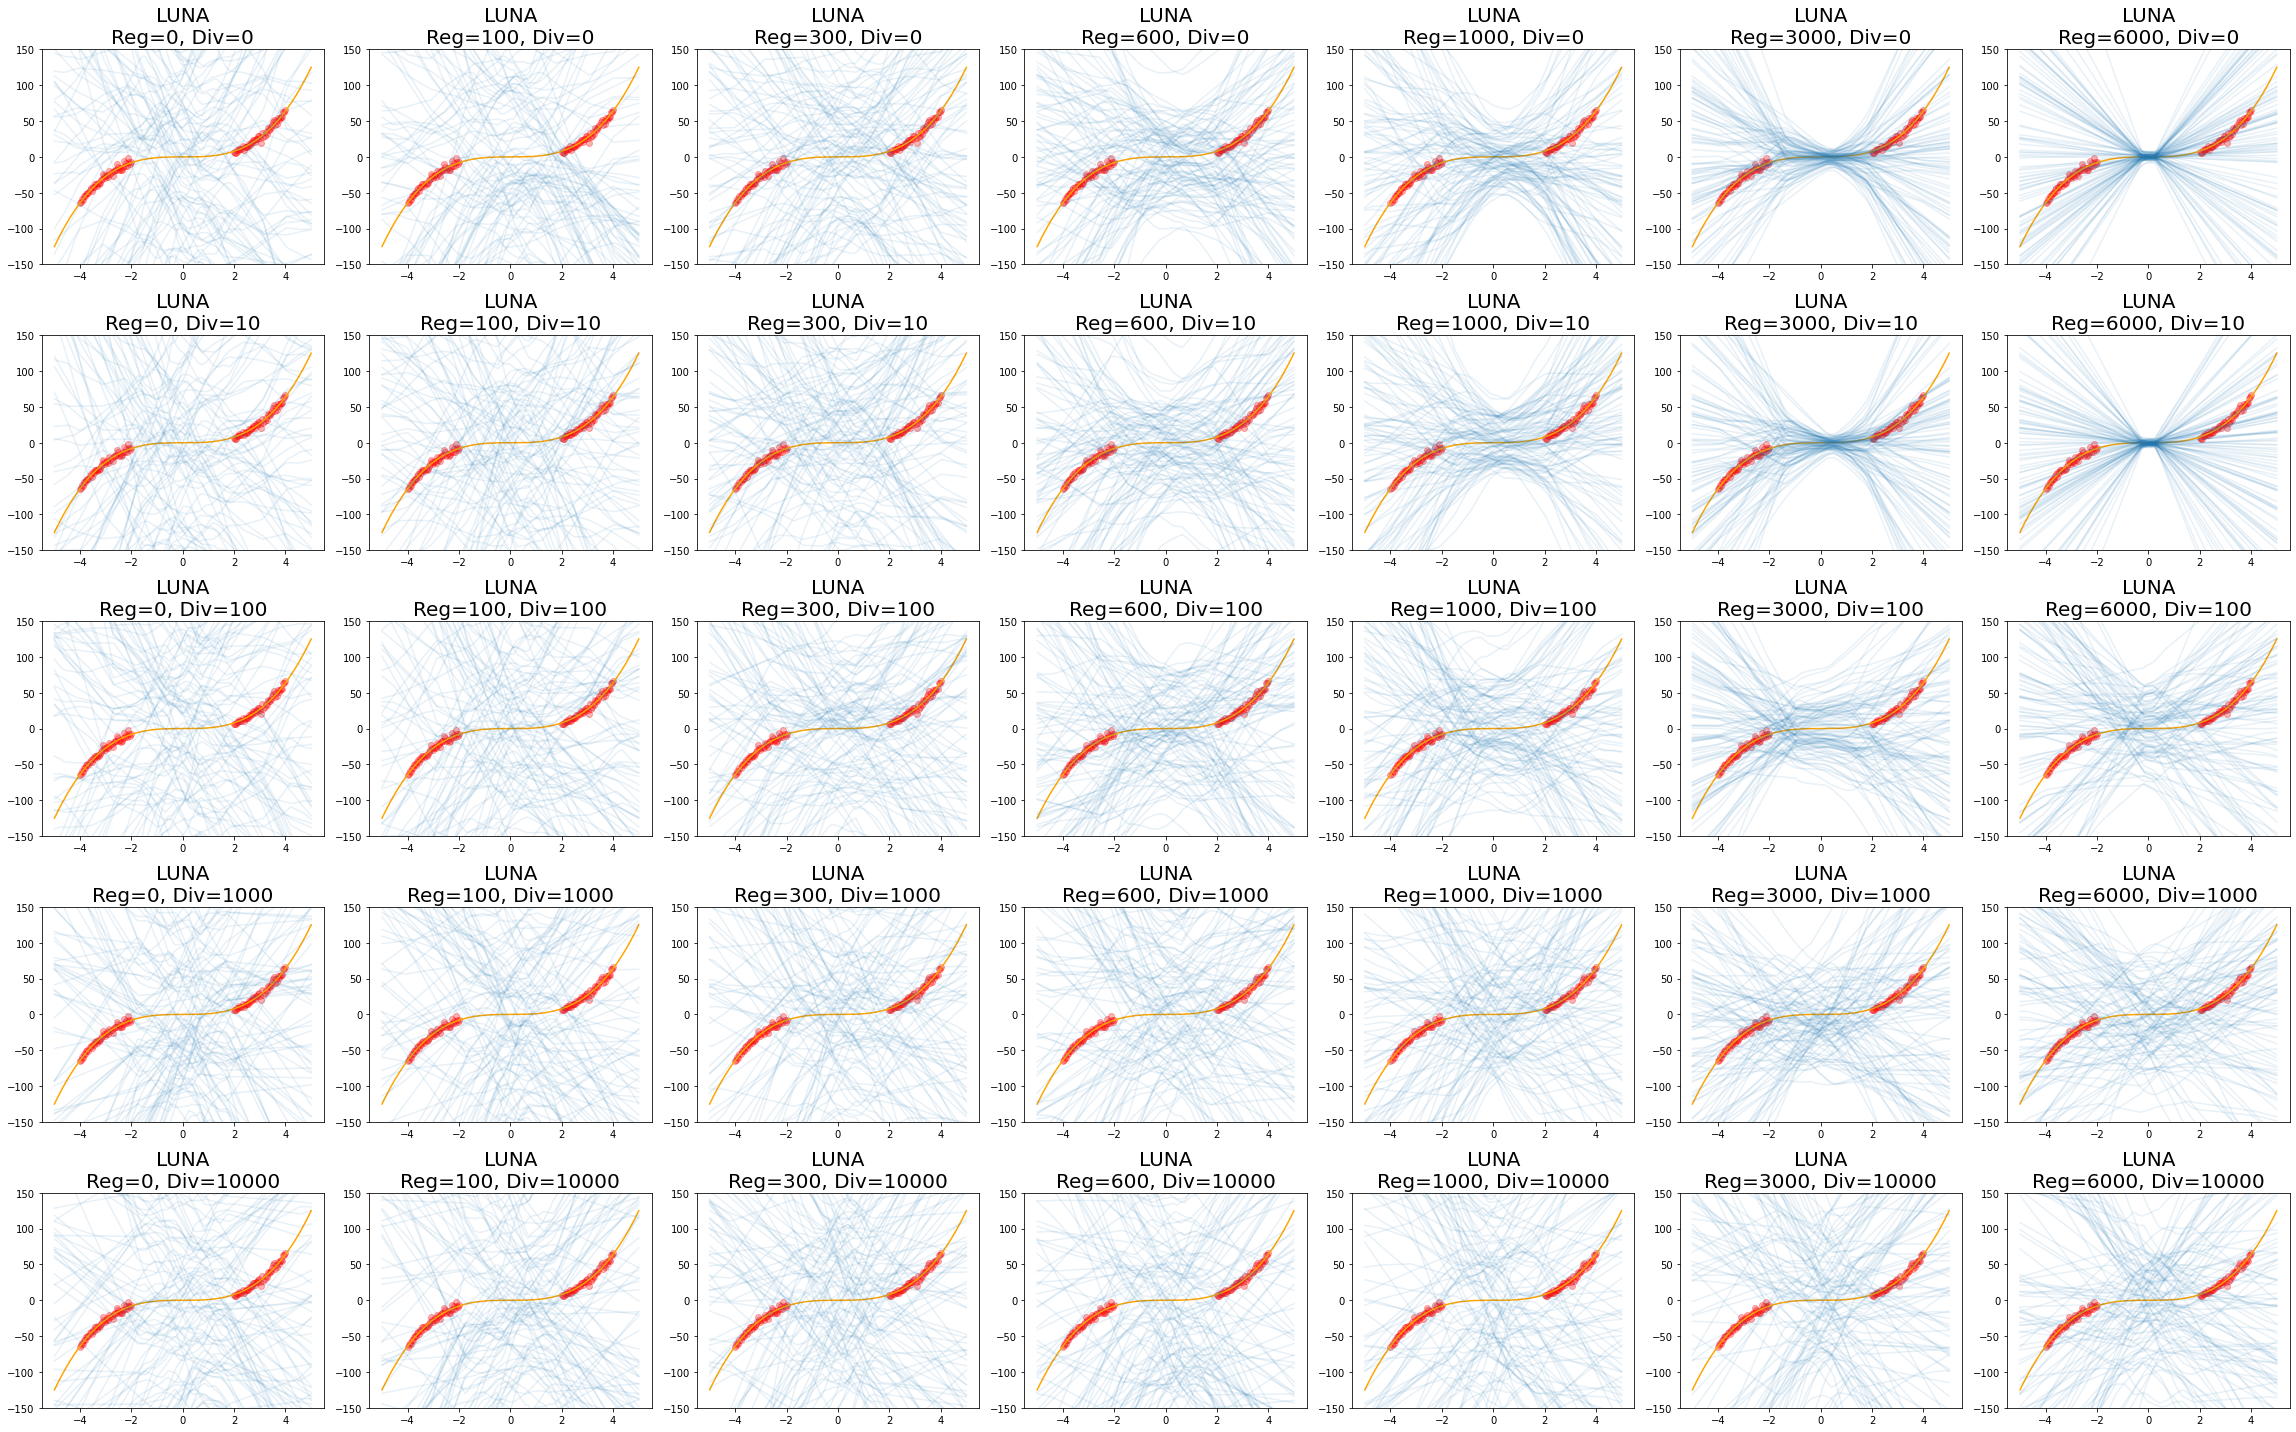

In [30]:
prior_mean = 0; prior_var = 9; noise_var = 9

fig, axes = plt.subplots(1, len(reg_grid), figsize=(30, 4))
for i, ax in enumerate(axes.flat):
    nlm = nlm_list[i]
    y_prior = nlm.get_prior_preds(x_test, w_prior_mean = prior_mean, w_prior_cov=prior_var, noise_var=noise_var)
    ax.scatter(x[0,:], y[0,:], color='red', alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], y_prior.T, color='tab:blue', alpha=0.1)
    ax.set_title(f"NLM\nReg={int(reg_grid[i])}",fontsize = 20)
    ax.set_ylim([-150, 150])
    if i == 0:
        ax.legend(loc=4,fontsize = 15, frameon=False)
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.savefig(imagePath+'prior_samples_NLM_10_aux_2000_steps.png',dpi = 150)
plt.show()

fig, axes = plt.subplots(len(div_grid), len(reg_grid), figsize=(32, 20))
for i, ax in enumerate(axes.flat):
    luna = luna_list[i]
    y_prior = luna.get_prior_preds(x_test, w_prior_mean = prior_mean, w_prior_cov=prior_var, noise_var=noise_var)
    ax.scatter(x[0,:], y[0,:], color='red', alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], y_prior.T, color='tab:blue', alpha=0.1)
    ax.set_ylim([-150, 150])
#     ax.set_title(f"LUNA: [Aux={luna.params['M']}, Reg={luna.params['reg_param']}, Div={luna.params['lambda_in']}]",fontsize=15)
    ax.set_title(f"LUNA\nReg={int(luna.params['reg_param'])}, Div={int(luna.params['lambda_in'])}",fontsize=20)
#     if i == 0:
#         ax.legend(loc='best',fontsize = 20, frameon=False)
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.savefig(imagePath+'prior_samples_LUNA_10_aux_2000_steps.png',dpi = 150)
plt.show()

## Plot posterior samples

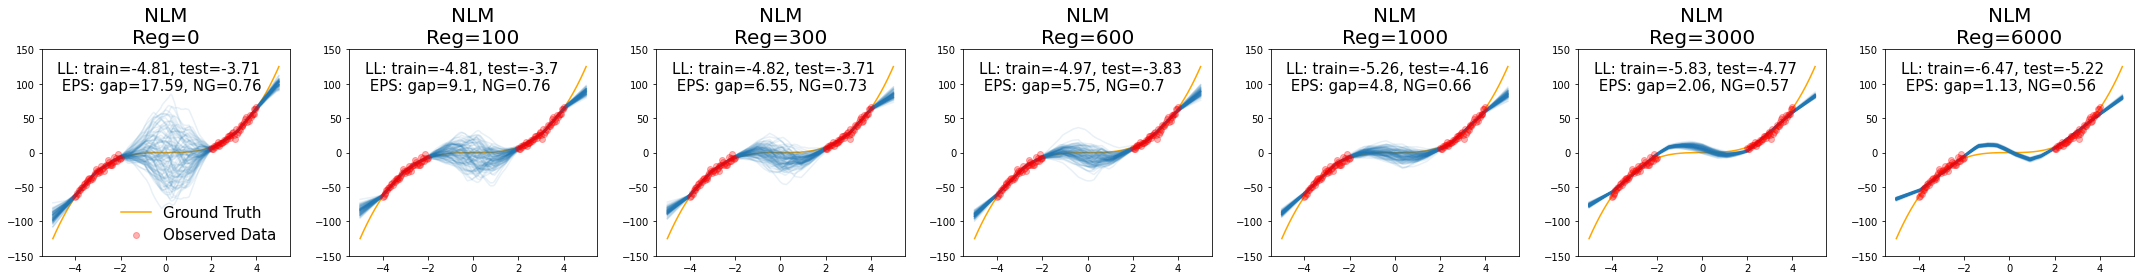

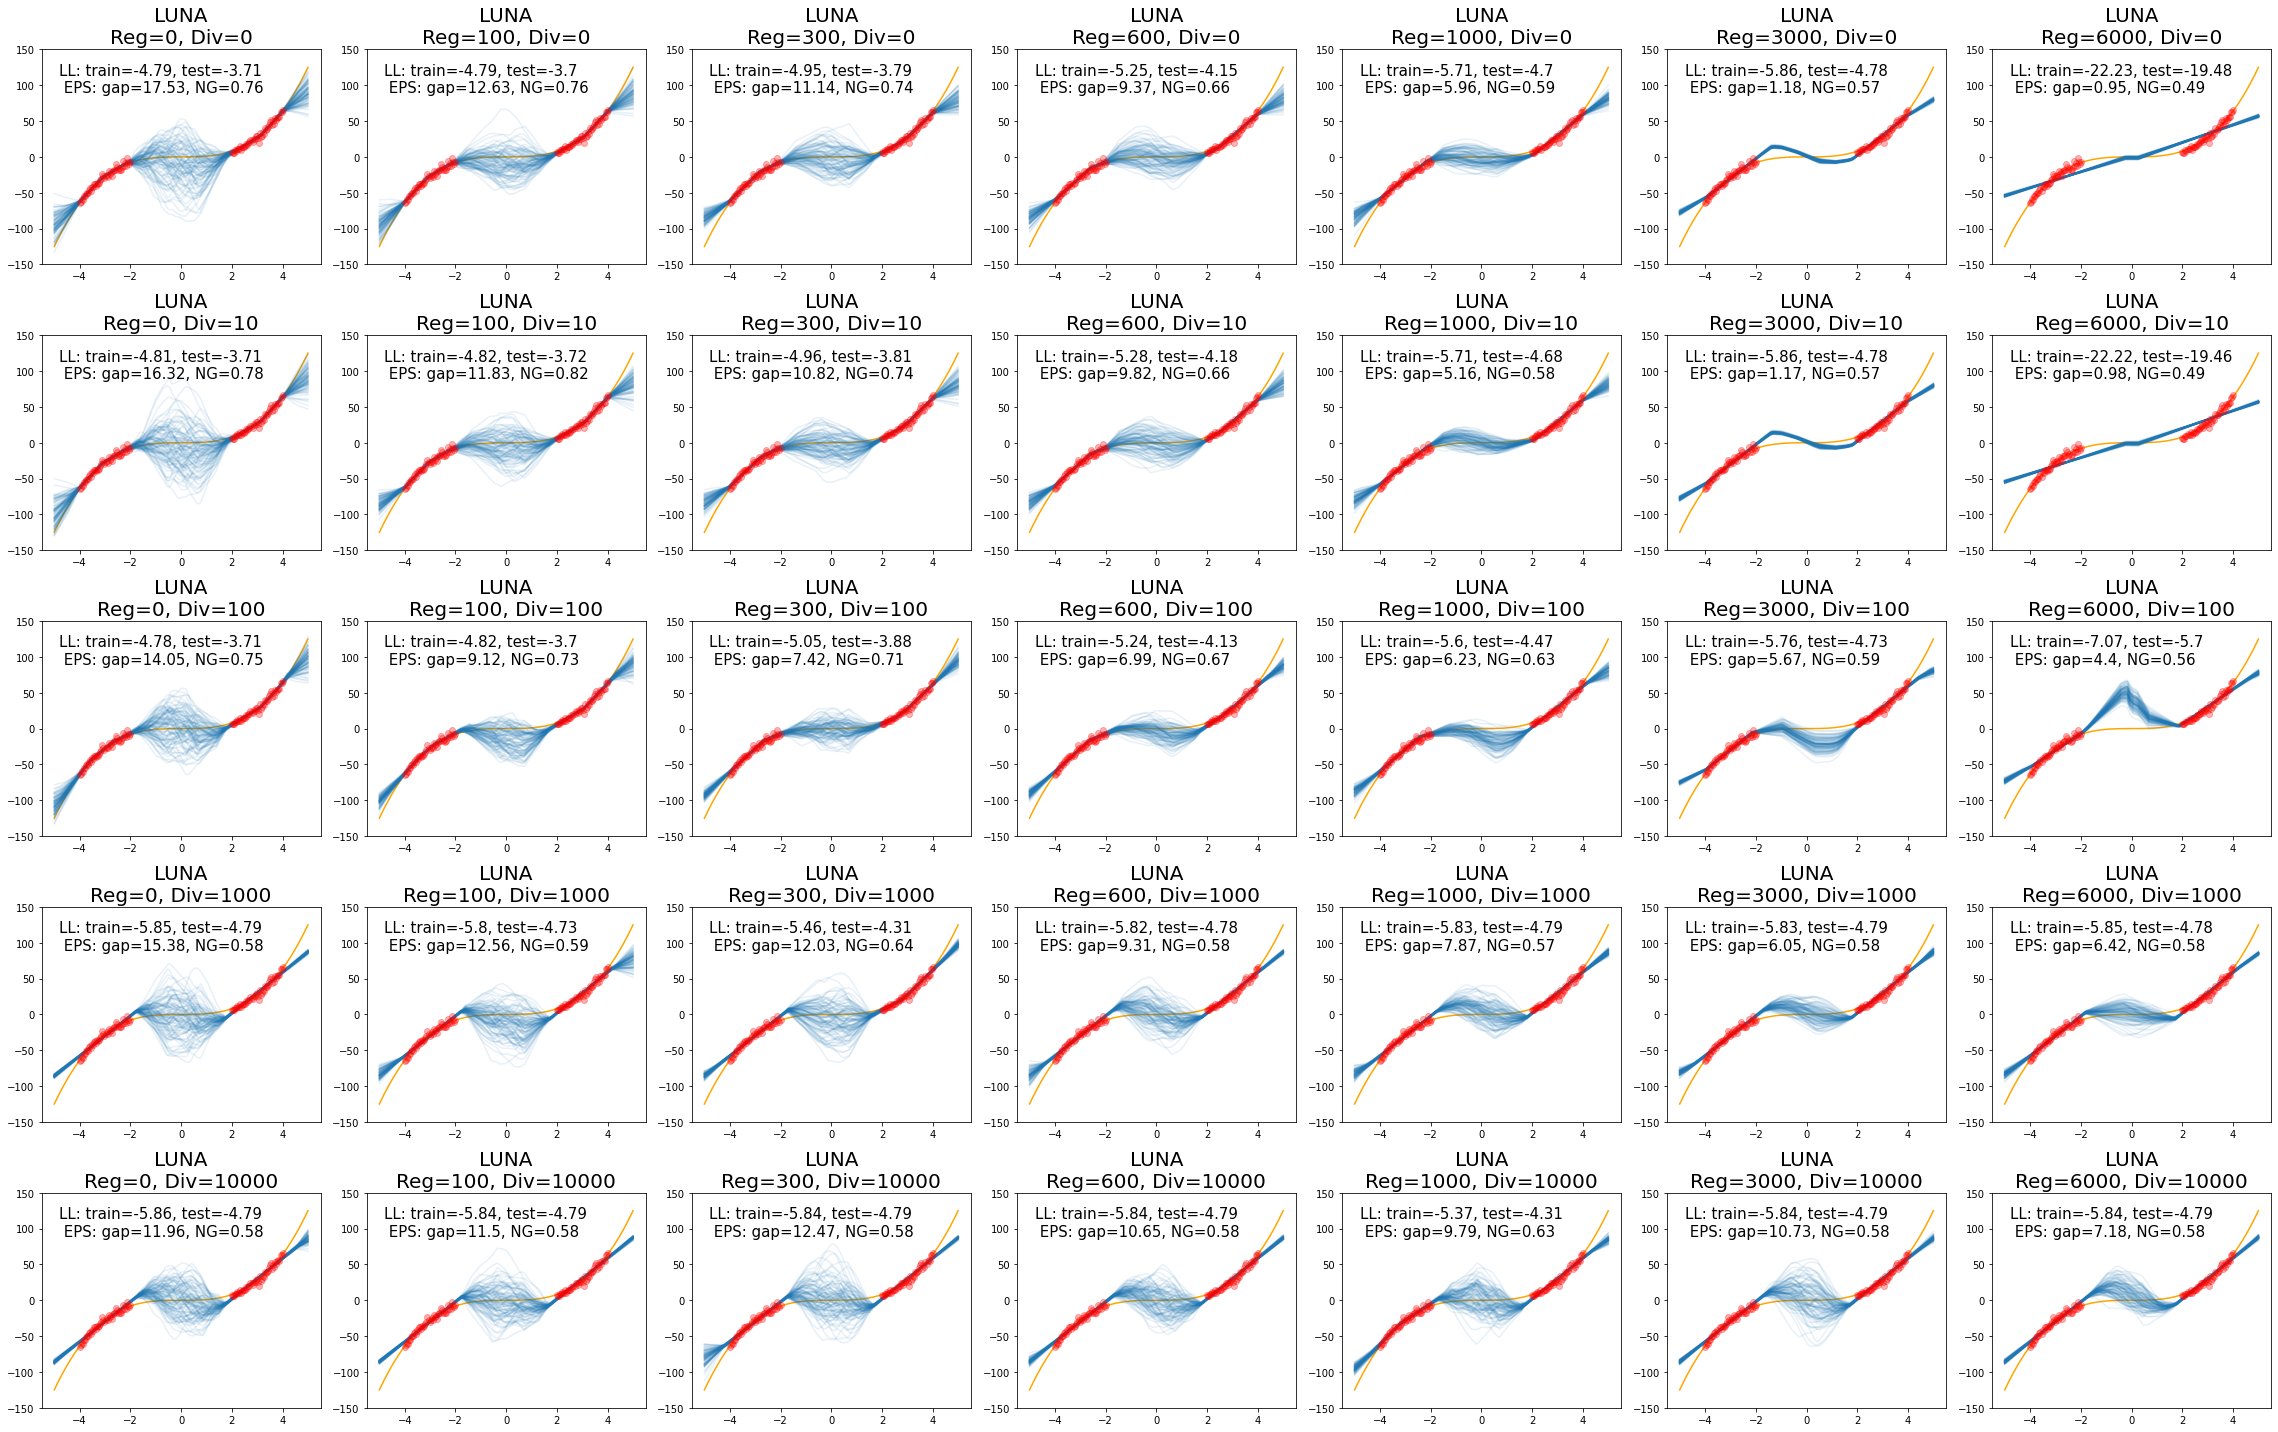

In [31]:
nll_train_list_nlm = []
nll_test_list_nlm = []
eps_gap_list_nlm = []
eps_non_gap_list_nlm = []

fig, axes = plt.subplots(1, len(reg_grid), figsize=(30, 4))
for i, ax in enumerate(axes.flat):
    nlm = nlm_list[i]
    y_posterior = nlm.get_posterior_preds(x_test, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var)
#     y_posterior += np.random.normal(0, noise_var**0.5, size = y_posterior.shape)
    
    ax.scatter(x[0,:], y[0,:], color='red', zorder = 1000, alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], y_posterior.T, color='tab:blue', alpha=0.1)
    ax.set_ylim([-150, 150])
    
    y_posterior_train = nlm.get_posterior_preds(x, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior_train_noise = y_posterior_train + np.random.normal(0, noise_var**0.5, size=y_posterior_train.shape)
    
    y_posterior_gap = nlm.get_posterior_preds(x_test_gap, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior_gap_noise = y_posterior_gap + np.random.normal(0, noise_var**0.5, size=y_posterior_gap.shape)

    y_posterior_non_gap = nlm.get_posterior_preds(x_test_non_gap, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior_non_gap_noise = y_posterior_non_gap + np.random.normal(0, noise_var**0.5, size=y_posterior_non_gap.shape)
    
    nll_train_list_nlm.append(np.round(neg_log_likelihood(y_posterior_train_noise, y, noise_var), 2))
    nll_test_list_nlm.append(np.round(neg_log_likelihood(y_posterior_non_gap_noise, y_test_non_gap, noise_var), 2))
    eps_gap_list_nlm.append(np.round(epistemic_uncertainty(y_posterior_gap), 2))
    eps_non_gap_list_nlm.append(np.round(epistemic_uncertainty(y_posterior_non_gap), 2))
    ax.text(-4.8,90, f"LL: train={-nll_train_list_nlm[i]}, test={-nll_test_list_nlm[i]}\n EPS: gap={eps_gap_list_nlm[i]}, NG={eps_non_gap_list_nlm[i]}", fontsize=15)
    
    ax.set_title(f"NLM\nReg={int(reg_grid[i])}",fontsize=20)
#     ax.set_title(f"NLM\nReg={reg_grid[i]}\nLL: train={-nll_train_list_nlm[i]}, test={-nll_test_list_nlm[i]}\nEPS: gap={eps_gap_list_nlm[i]}, NG={eps_non_gap_list_nlm[i]}",fontsize=20)

    if i == 0:
        ax.legend(loc=4,fontsize = 15, frameon = False)
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.savefig(imagePath+'post_samples_NLM_10_aux_2000_steps.png',dpi = 150)
plt.show()


nll_train_list_luna = []
nll_test_list_luna = []
eps_gap_list_luna = []
eps_non_gap_list_luna = []

fig, axes = plt.subplots(len(div_grid), len(reg_grid), figsize=(32, 20))
for i, ax in enumerate(axes.flat):
    luna = luna_list[i]
    y_posterior = luna.get_posterior_preds(x_test, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var)
#     y_posterior += np.random.normal(0, noise_var**0.5, size = y_posterior.shape)
    
    ax.scatter(x[0,:], y[0,:], color='red', zorder = 1000, alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], y_posterior.T, color='tab:blue', alpha=0.1)
    ax.set_ylim([-150, 150])
    
    y_posterior_train = luna.get_posterior_preds(x, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior_train_noise = y_posterior_train + np.random.normal(0, noise_var**0.5, size=y_posterior_train.shape)
    
    y_posterior_gap = luna.get_posterior_preds(x_test_gap, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior_gap_noise = y_posterior_gap + np.random.normal(0, noise_var**0.5, size=y_posterior_gap.shape)

    y_posterior_non_gap = luna.get_posterior_preds(x_test_non_gap, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior_non_gap_noise = y_posterior_non_gap + np.random.normal(0, noise_var**0.5, size=y_posterior_non_gap.shape)
    
    nll_train_list_luna.append(np.round(neg_log_likelihood(y_posterior_train_noise, y, noise_var), 2))
    nll_test_list_luna.append(np.round(neg_log_likelihood(y_posterior_non_gap_noise, y_test_non_gap, noise_var), 2))
    eps_gap_list_luna.append(np.round(epistemic_uncertainty(y_posterior_gap), 2))
    eps_non_gap_list_luna.append(np.round(epistemic_uncertainty(y_posterior_non_gap), 2))
    
    ax.text(-4.8,90, f"LL: train={-nll_train_list_luna[i]}, test={-nll_test_list_luna[i]}\n EPS: gap={eps_gap_list_luna[i]}, NG={eps_non_gap_list_luna[i]}", fontsize=15)
    ax.set_title(f"LUNA\nReg={int(luna.params['reg_param'])}, Div={int(luna.params['lambda_in'])}",fontsize=20)
#     ax.set_title(f"LUNA\nReg={luna.params['reg_param']}, Div={luna.params['lambda_in']}\nLL: train={-nll_train_list_luna[i]}, test={-nll_test_list_luna[i]}\nEPS: gap={eps_gap_list_luna[i]}, NG={eps_non_gap_list_luna[i]}",fontsize=20)
#     ax.set_title(f"LUNA: [Aux={luna.params['M']}, Reg={luna.params['reg_param']}, Div={luna.params['lambda_in']}]\nNLL: train={nll_train_list_luna[i]}, test={nll_test_list_luna[i]}\nEPS: gap={eps_gap_list_luna[i]}, non-gap={eps_non_gap_list_luna[i]}",fontsize=20)
#     ax.legend(loc='best',fontsize = 20, frameon = False)
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.savefig(imagePath+'post_samples_LUNA_10_aux_2000_steps.png',dpi = 150)
plt.show()

## Plot posterior predictive intervals

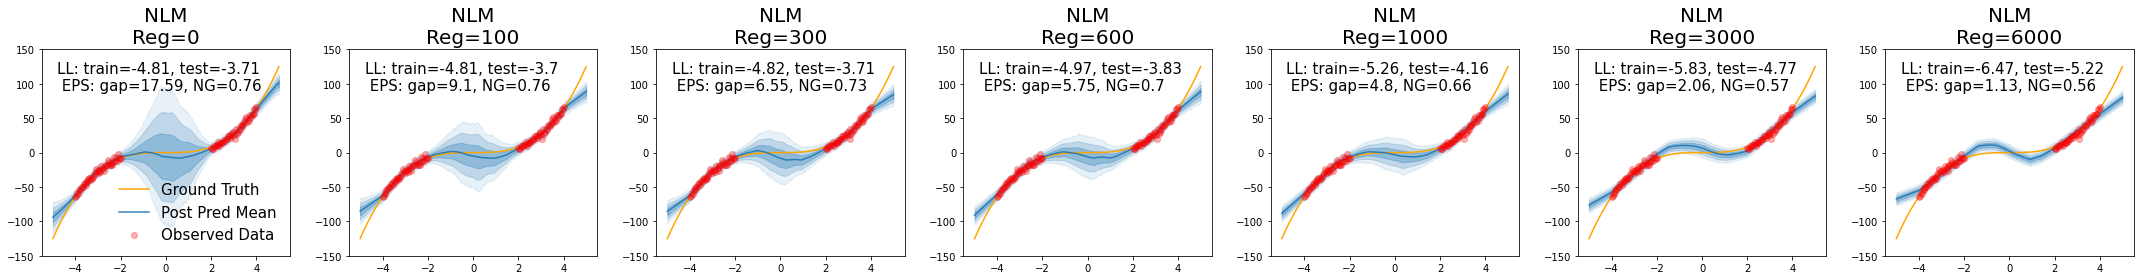

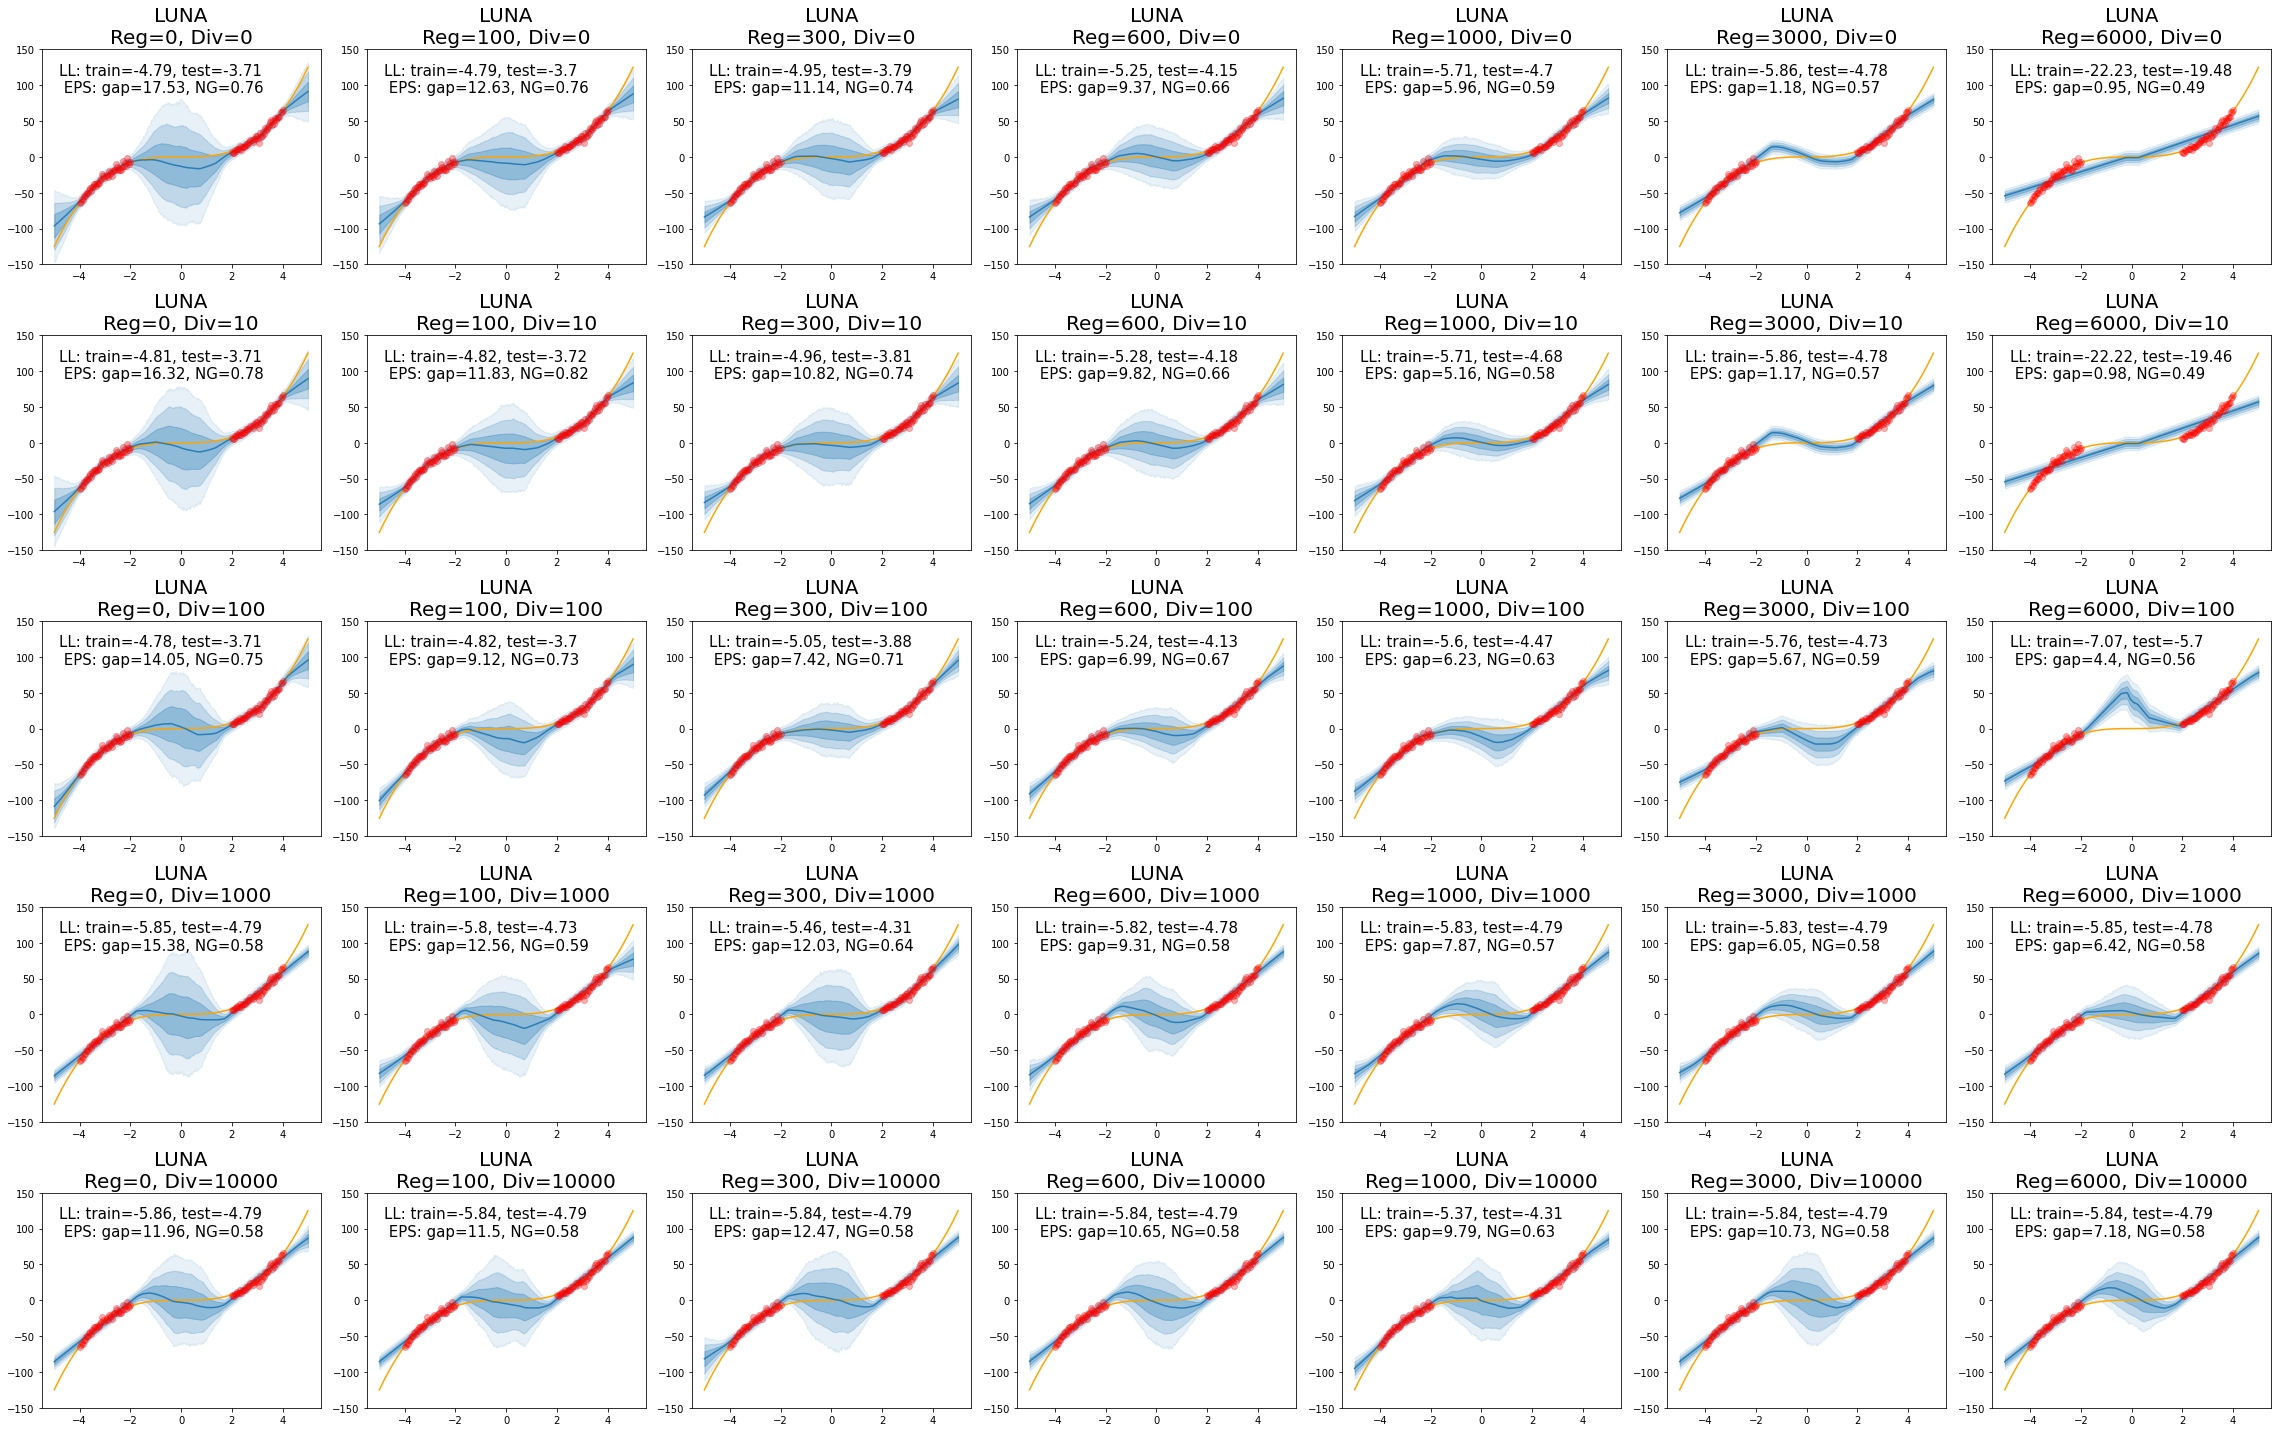

In [32]:
fig, axes = plt.subplots(1, len(reg_grid), figsize=(30, 4))
for i, ax in enumerate(axes.flat):
    nlm = nlm_list[i]
    y_posterior = nlm.get_posterior_preds(x_test, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior += np.random.normal(0, noise_var**0.5, size = y_posterior.shape)
    
    pp_upper = np.percentile(y_posterior, 97.5, axis=0)
    pp_lower = np.percentile(y_posterior, 2.5, axis=0)
    pp_upper2 = np.percentile(y_posterior, 84, axis=0)
    pp_lower2 = np.percentile(y_posterior, 16, axis=0)
    pp_upper3 = np.percentile(y_posterior, 99.85, axis=0)
    pp_lower3 = np.percentile(y_posterior, 0.15, axis=0)
    pp_mean = np.mean(y_posterior, axis=0)

    ax.scatter(x[0,:], y[0,:], color='red', zorder = 1000, alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], pp_mean, color='tab:blue', alpha=0.9, label='Post Pred Mean')
    ax.fill_between(x_test[0,:], pp_upper, pp_lower, color='tab:blue', alpha=0.2)
    ax.fill_between(x_test[0,:], pp_upper2, pp_lower2, color = 'tab:blue', alpha = 0.3)
    ax.fill_between(x_test[0,:], pp_upper3, pp_lower3, color = 'tab:blue', alpha = 0.1)

    ax.set_ylim([-150, 150])
    ax.text(-4.8,90, f"LL: train={-nll_train_list_nlm[i]}, test={-nll_test_list_nlm[i]}\n EPS: gap={eps_gap_list_nlm[i]}, NG={eps_non_gap_list_nlm[i]}", fontsize=15)
    
    ax.set_title(f"NLM\nReg={int(reg_grid[i])}",fontsize=20)
    if i == 0:
        ax.legend(loc=4,fontsize = 15, frameon = False)

#     ax.set_title(f"NLM: Reg={reg_grid[i]}\nNLL: train={nll_train_list_nlm[i]}, test={nll_test_list_nlm[i]}\nEPS: gap={eps_gap_list_nlm[i]}, non-gap={eps_non_gap_list_nlm[i]}",fontsize=20)

#     if i == 0:
#         ax.legend(loc='best',fontsize = 20, frameon = False)
plt.subplots_adjust(hspace=0.3)
plt.savefig(imagePath+'PPI_NLM_10_aux_2000_steps.png',dpi = 150)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(len(div_grid), len(reg_grid), figsize=(32, 20))
for i, ax in enumerate(axes.flat):
    luna = luna_list[i]
    y_posterior = luna.get_posterior_preds(x_test, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior += np.random.normal(0, noise_var**0.5, size = y_posterior.shape)
    
    pp_upper = np.percentile(y_posterior, 97.5, axis=0)
    pp_lower = np.percentile(y_posterior, 2.5, axis=0)
    pp_upper2 = np.percentile(y_posterior, 84, axis=0)
    pp_lower2 = np.percentile(y_posterior, 16, axis=0)
    pp_upper3 = np.percentile(y_posterior, 99.85, axis=0)
    pp_lower3 = np.percentile(y_posterior, 0.15, axis=0)
    pp_mean = np.mean(y_posterior, axis=0)

    ax.scatter(x[0,:], y[0,:], color='red', zorder = 1000, alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], pp_mean, color='tab:blue', alpha=0.9, label='Posterior Predictive Mean')
    ax.fill_between(x_test[0,:], pp_upper, pp_lower, color='tab:blue', alpha=0.2)
    ax.fill_between(x_test[0,:], pp_upper2, pp_lower2, color = 'tab:blue', alpha = 0.3)
    ax.fill_between(x_test[0,:], pp_upper3, pp_lower3, color = 'tab:blue', alpha = 0.1)

    ax.set_ylim([-150, 150])  
    ax.text(-4.8,90, f"LL: train={-nll_train_list_luna[i]}, test={-nll_test_list_luna[i]}\n EPS: gap={eps_gap_list_luna[i]}, NG={eps_non_gap_list_luna[i]}", fontsize=15)
    ax.set_title(f"LUNA\nReg={int(luna.params['reg_param'])}, Div={int(luna.params['lambda_in'])}",fontsize=20)

#     ax.set_title(f"LUNA: [Aux={luna.params['M']}, Reg={luna.params['reg_param']}, Div={luna.params['lambda_in']}]\nNLL: train={nll_train_list_luna[i]}, test={nll_test_list_luna[i]}\nEPS: gap={eps_gap_list_luna[i]}, non-gap={eps_non_gap_list_luna[i]}",fontsize=20)
#     if i == 0:
#         ax.legend(loc='best',fontsize = 20, frameon = False)
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.savefig(imagePath+'PPI_LUNA_10_aux_2000_steps.png',dpi = 150)
plt.show()



## Evaluate model performance (log likelihood) and epistemic uncertainty

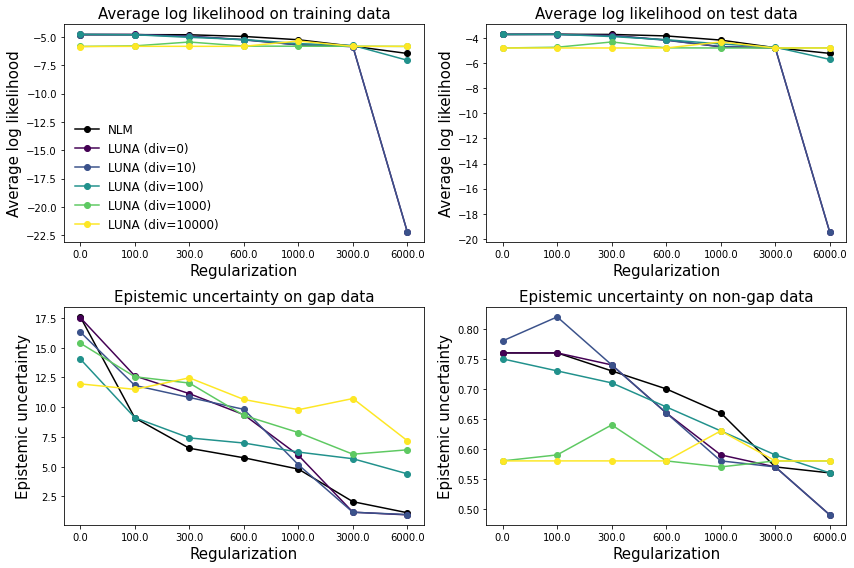

In [33]:
cmap = plt.get_cmap('viridis', len(div_grid))
fontsize = 15
fig, axes = plt.subplots(2,2,figsize = (12,8))
axes[0,0].plot(-np.array(nll_train_list_nlm),'k-o', label='NLM')
for idx, div in enumerate(div_grid):
    axes[0,0].plot(-np.array(nll_train_list_luna).reshape(len(div_grid), len(reg_grid))[idx,:],'-o', color = cmap(idx), label=f"LUNA (div={int(div)})")
axes[0,0].set_xticks(range(len(reg_grid)))
axes[0,0].set_xticklabels(np.array(reg_grid))
axes[0,0].set_xlabel('Regularization',fontsize = fontsize)
axes[0,0].set_ylabel('Average log likelihood',fontsize = fontsize)
# axes[0,0].set_ylim([-23,-3])
axes[0,0].legend(frameon=False,fontsize = 12)
axes[0,0].set_title('Average log likelihood on training data',fontsize = fontsize)

axes[0,1].plot(-np.array(nll_test_list_nlm),'k-o', label='NLM')
for idx, div in enumerate(div_grid):
    axes[0,1].plot(-np.array(nll_test_list_luna).reshape(len(div_grid), len(reg_grid))[idx,:],'-o', color = cmap(idx), label=f"LUNA (div={div})")
axes[0,1].set_xticks(range(len(reg_grid)))
axes[0,1].set_xticklabels(np.array(reg_grid))
axes[0,1].set_xlabel('Regularization',fontsize = fontsize)
axes[0,1].set_ylabel('Average log likelihood',fontsize = fontsize)
# axes[0,1].set_ylim([-23,-3])
# axes[0,1].legend(frameon=False)
axes[0,1].set_title('Average log likelihood on test data',fontsize = fontsize)

axes[1,0].plot(eps_gap_list_nlm,'k-o', label='NLM')
for idx, div in enumerate(div_grid):
    axes[1,0].plot(np.array(eps_gap_list_luna).reshape(len(div_grid), len(reg_grid))[idx,:],'-o', color = cmap(idx), label=f"LUNA (div={div})")
axes[1,0].set_xticks(range(len(reg_grid)))
axes[1,0].set_xticklabels(np.array(reg_grid))
axes[1,0].set_xlabel('Regularization',fontsize = fontsize)
axes[1,0].set_ylabel('Epistemic uncertainty',fontsize = fontsize)
# axes[1,0].set_ylim([0,22])
# axes[1,0].legend(frameon=False)
axes[1,0].set_title('Epistemic uncertainty on gap data',fontsize = fontsize)

axes[1,1].plot(eps_non_gap_list_nlm,'k-o', label='NLM')
for idx, div in enumerate(div_grid):
    axes[1,1].plot(np.array(eps_non_gap_list_luna).reshape(len(div_grid), len(reg_grid))[idx,:],'-o', color = cmap(idx), label=f"LUNA (div={div})")
axes[1,1].set_xticks(range(len(reg_grid)))
axes[1,1].set_xticklabels(np.array(reg_grid))
axes[1,1].set_xlabel('Regularization',fontsize = fontsize)
axes[1,1].set_ylabel('Epistemic uncertainty',fontsize = fontsize)
# axes[1,1].set_ylim([0,22])
# axes[1,1].legend(frameon=False)
axes[1,1].set_title('Epistemic uncertainty on non-gap data',fontsize = fontsize)

plt.tight_layout()
plt.savefig(imagePath+'evaluation_10_aux_2000_steps.png',dpi = 150)
plt.show()

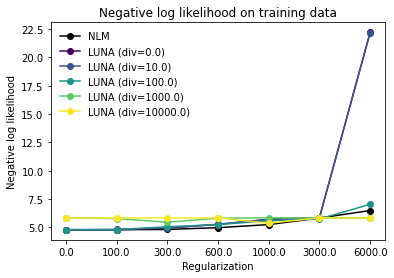

In [16]:
cmap = plt.get_cmap('viridis', len(div_grid))
plt.plot(nll_train_list_nlm,'k-o', label='NLM')
for idx, div in enumerate(div_grid):
    plt.plot(np.array(nll_train_list_luna).reshape(len(div_grid), len(reg_grid))[idx,:],'-o', color = cmap(idx), label=f"LUNA (div={div})")
plt.xticks(range(len(reg_grid)),labels=reg_grid)
plt.xlabel('Regularization')
plt.ylabel('Negative log likelihood')
plt.legend(frameon=False)
plt.title('Negative log likelihood on training data')
plt.show()

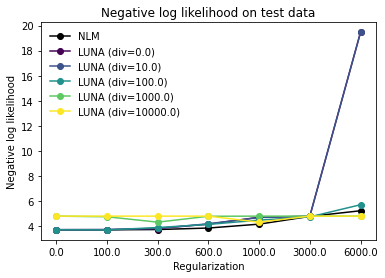

In [17]:
plt.plot(nll_test_list_nlm,'k-o', label='NLM')
for idx, div in enumerate(div_grid):
    plt.plot(np.array(nll_test_list_luna).reshape(len(div_grid), len(reg_grid))[idx,:],'-o', color = cmap(idx), label=f"LUNA (div={div})")
plt.xticks(range(len(reg_grid)),labels=reg_grid)
plt.xlabel('Regularization')
plt.ylabel('Negative log likelihood')
plt.legend(frameon=False)
plt.title('Negative log likelihood on test data')
plt.show()

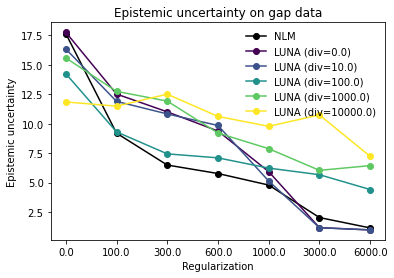

In [18]:
plt.plot(eps_gap_list_nlm,'k-o', label='NLM')
for idx, div in enumerate(div_grid):
    plt.plot(np.array(eps_gap_list_luna).reshape(len(div_grid), len(reg_grid))[idx,:],'-o', color = cmap(idx), label=f"LUNA (div={div})")
plt.xticks(range(len(reg_grid)),labels=reg_grid)
plt.xlabel('Regularization')
plt.ylabel('Epistemic uncertainty')
plt.legend(frameon=False)
plt.title('Epistemic uncertainty on gap data')
plt.show()

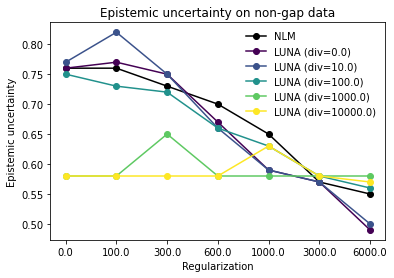

In [19]:
plt.plot(eps_non_gap_list_nlm,'k-o', label='NLM')
for idx, div in enumerate(div_grid):
    plt.plot(np.array(eps_non_gap_list_luna).reshape(len(div_grid), len(reg_grid))[idx,:],'-o', color = cmap(idx), label=f"LUNA (div={div})")
plt.xticks(range(len(reg_grid)),labels=reg_grid)
plt.xlabel('Regularization')
plt.ylabel('Epistemic uncertainty')
plt.legend(frameon=False)
plt.title('Epistemic uncertainty on non-gap data')
plt.show()